假設今天有一個數據集分成A，B兩類別，各占了90%與10%。那麼今天就算我永遠猜A都有9成的準確率。更可怕的是，萬一我用train出來的model的準確率是89%，代表比瞎猜還不如。因此正確率不能當成模型好壞唯一的指標(尤其是對於數據集失衡的狀況)。因此我們引入一個新觀念：混淆矩陣。

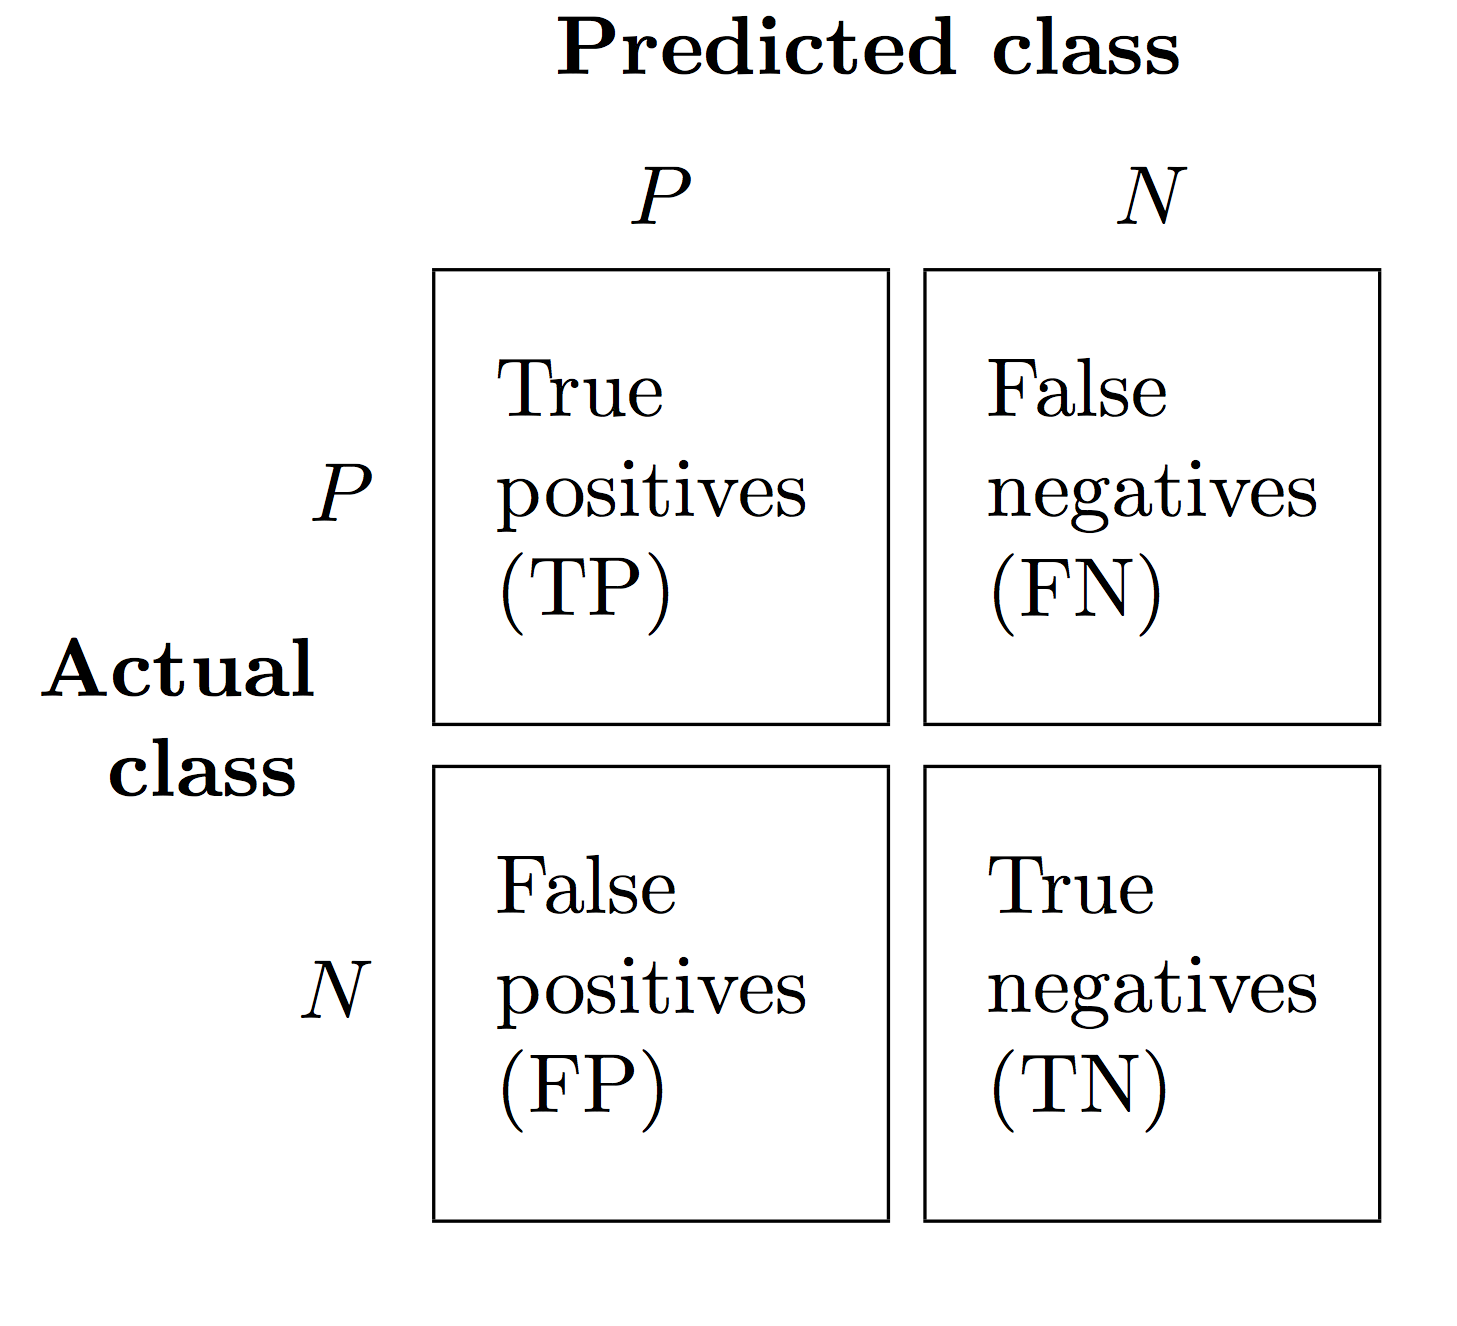

In [3]:
from IPython.display import Image
Image(filename='conmat.png', width=300) 

與之對應的，我們有很多種判斷模型好壞的指標。我們應該就整個數據集各種類別分布情形決定採用哪一種指標。

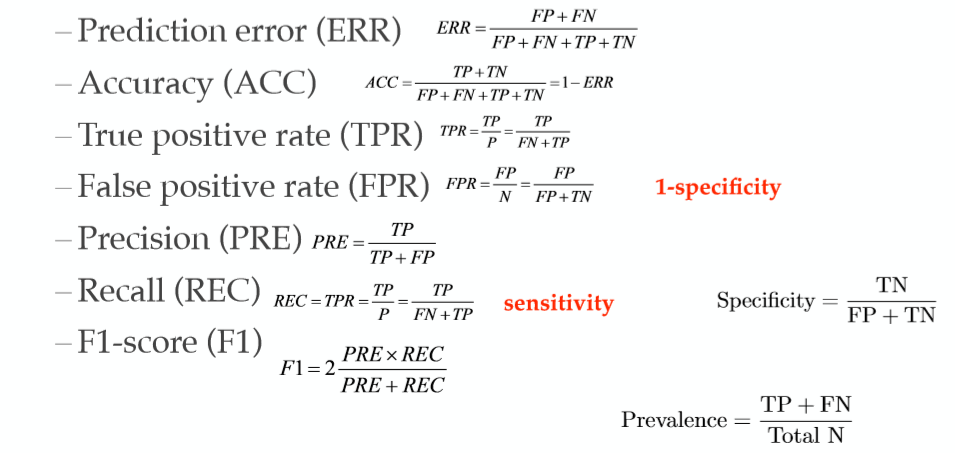

In [6]:
Image(filename='metrics.png', width=800) 

來畫畫看乳癌數據集的混淆矩陣。引進資料集後，先用支援向量機對其進行預測。

In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

df = pd.read_csv('wdbc.data', header=None) # 讀取乳癌數據集
X = df.loc[:, 2:].values
y = df.loc[:, 1].values

# 以8:2的比例製造測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=1) 

pipe_svc = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        SVC(C=100.0, gamma=0.001, kernel='rbf', random_state=1)) # 參數是上一節中用巢狀交叉驗證找的

pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
print('Test Accuracy: %.3f' % pipe_svc.score(X_test, y_test))

Test Accuracy: 0.965


接著使用sciki learn裡面的confusion_matrix函數輸出混淆矩陣。

In [23]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 3 39]]


如果嫌上面畫得太醜，可以用以下的code來畫

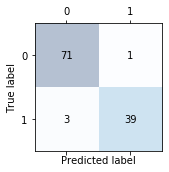

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show() # 類別mapping: M=1, B=0